Accuracy: 0.7988826815642458
Confusion Matrix:
 [[87 18]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<ipython-input-10-e18619971d9b>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-10-e18619971d9b>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

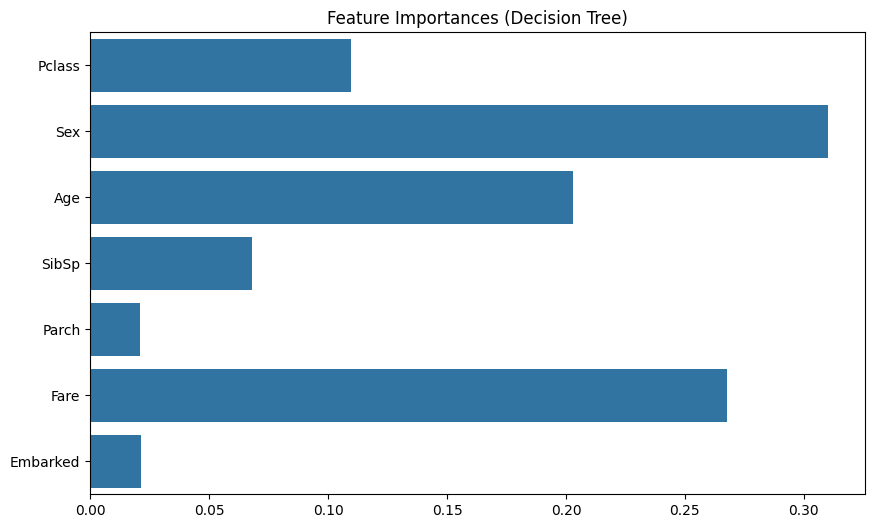

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Baca data dari folder hasil ekstrak
train_data = pd.read_csv('titanic_data/train.csv')
test_data = pd.read_csv('titanic_data/test.csv')

# Drop kolom yang tidak dibutuhkan
train_data = train_data.drop(['Cabin', 'Ticket', 'Name'], axis=1)
test_data = test_data.drop(['Cabin', 'Ticket', 'Name'], axis=1)

# Isi nilai kosong
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Ubah data kategorikal ke numerik
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Pilih fitur
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']

# Bagi data menjadi training dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Prediksi data test
X_test = test_data[features]
test_pred = model.predict(X_test)

# Simpan ke submission.csv
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('submission.csv', index=False)

# (Opsional) Unduh file hasil
from google.colab import files
files.download('submission.csv')

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=features)
plt.title("Feature Importances (Decision Tree)")
plt.show()
